In [1]:
# importing the dataset

import pandas as pd
housing = pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
# converting Yes to 1 and No to 0

housing['mainroad'] = housing['mainroad'].map({'yes':1,'no':0})
housing ['guestroom'] = housing['guestroom'].map({'yes':1,'no':0})
housing['basement'] = housing['basement'].map({'yes':1,'no':0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes':1,'no':0})
housing['airconditioning'] = housing['airconditioning'].map({'yes':1,'no':0})
housing['prefarea'] = housing['prefarea'].map({'yes':1,'no':0})


In [3]:
housing.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished


In [4]:
# converting furnishing status column to binary columns using  get_dummies method

status = pd.get_dummies(housing['furnishingstatus'],drop_first=True)
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [5]:
housing = pd.concat([housing,status],axis=1)
# axis =1 will concatenate dataframes in horizontal fashion i.e. col wise.
# pd.concat([df1,df2],axis=1)

housing.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0


In [6]:
# dropping furnishingstatus as it will be a duplicate column now

housing.drop(columns=['furnishingstatus'],inplace=True)
housing.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0


In [7]:
# normalizing the data x= x1-mean / std
housing = (housing - housing.mean())/housing.std()
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-0.844113,-0.69579


In [8]:
# simple linear regression
# estmate the price of the area
# independent variable - area; dependent(output variable)=price
# price = X0 + M (area)
# y = c + mx

X = housing['area']
y = housing['price']

In [9]:
import seaborn as sns
# to visualize in the notebook
%matplotlib inline

<AxesSubplot:xlabel='area', ylabel='price'>

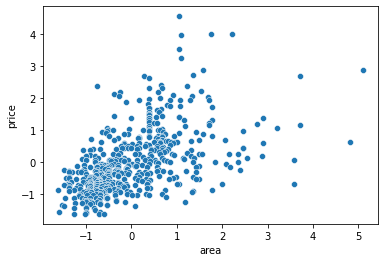

In [10]:
sns.scatterplot(data= housing,x='area',y='price')

In [13]:
# cost function = sum( actual values - predicted values)^2

import numpy as np
X = np.array(X)
y = np.array(y)


In [16]:
# implement gradient descent function
# takes in X,y,current m and c(both=0), num_iterations,learning rate
# returns gradient at current m and c for each pair of m and c

def gradient(X,y,m_current=0,c_current=0, iters=1000, learning_rate=0.01):
    N = float(len(y))
    gd_df = pd.DataFrame(columns=['m_current','c_current','cost'])
    for i in range(iters):
        y_current = (m_current * X) + c_current
        cost = sum([data**2 for data in (y-y_current)])/N
        m_gradient = -(2/N)*sum(X*(y-y_current))
        c_gradient = -(2/N)*sum(y-y_current)
        m_current = m_current - (learning_rate * m_gradient)
        c_current = c_current - (learning_rate * c_gradient)
        gd_df.loc[i] = [m_current,c_current,cost]
    return(gd_df)

'learning_rate' variable controls the steps we take in downward direction in each. If learning rate is too low, the algorithm may take longer to to reach the minimum value.

In [17]:
gradients = gradient(X,y)
gradients

,m_current,c_current,cost
0,0.010700,3.731979e-18,0.998165
1,0.021187,1.981697e-17,0.986830
2,0.031464,2.998621e-17,0.975943
3,0.041536,2.656387e-17,0.965486
4,0.051407,2.433120e-17,0.955442
...,...,...,...
995,0.535997,2.741375e-16,0.711399
996,0.535997,2.679610e-16,0.711399
997,0.535997,2.660787e-16,0.711399
998,0.535997,2.639846e-16,0.711399


<AxesSubplot:xlabel='index'>

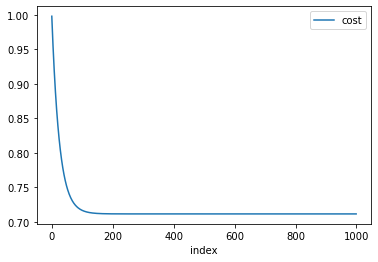

In [18]:
# plotting cost against num_iterations
gradients.reset_index().plot.line(x='index', y=['cost'])

The graph above shows how the cost decreases as we increase the number of iterations. The graph above explains the concept of gradient descent, which is to find out the values of the coefficient by minimising the cost function

# Applying gradient descent for multiple regression

In [20]:
X = housing[['area','bedrooms']]
y = housing['price']

In [21]:
X['intercept'] =1

<ipython-input-21-71c32063d145>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] =1


In [23]:

X.head(2)

,area,bedrooms,intercept
0,1.045766,1.402131,1
1,1.755397,1.402131,1


In [26]:
# convert x and y into numpy arrays

X = np.array(X)
y = np.array(y)

theta = np.matrix(np.array([0,0,0]))
alpha= 0.01
iterations = 1000

In [27]:
# define cost function
# takes in theta (current values of coefficients b0, b1, b2), X and y
# returns total cost at current b0, b1, b2

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [28]:
# gradient descent
# takes in current X, y, learning rate alpha, num_iters
# returns cost (notice it uses the cost function defined above)

def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [29]:
# print costs with various values of coefficients b0, b1, b2
gradient_descent_multi(X, y, theta, alpha, iterations)

,Bets,cost
0,"[0.005350138644096795, 0.003658215596715304, 3...",0.494906
1,"[0.010641328951860776, 0.007271806428759801, 4...",0.490824
2,"[0.015874226967184053, 0.0108413072787747, 6.6...",0.486834
3,"[0.021049481374934613, 0.014367246596957, 8.40...",0.482935
4,"[0.02616773358401025, 0.01785014657542254, 9.7...",0.479124
...,...,...
995,"[0.4916558741575691, 0.29184522587222433, 3.34...",0.314176
996,"[0.49165609672441285, 0.2918450929508476, 3.34...",0.314176
997,"[0.49165631727115394, 0.29184496101887925, 3.3...",0.314176
998,"[0.49165653581645663, 0.2918448300695054, 3.33...",0.314176


<AxesSubplot:xlabel='index'>

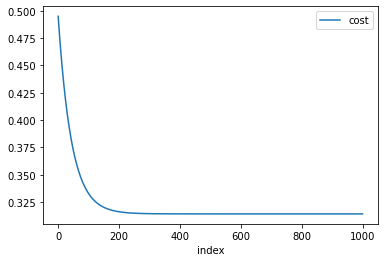

In [30]:
# print cost
gradient_descent_multi(X, y, theta, alpha, iterations).reset_index().plot.line(x='index', y=['cost'])

In [32]:
# gradient descent on advertising dataset

ad = pd.read_csv("advertising.csv")
ad.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [33]:
ad = (ad - ad.mean())/ad.std()

In [34]:
ad.head()

,TV,Radio,Newspaper,Sales
0,0.967425,0.979066,1.774493,1.548168
1,-1.194379,1.080097,0.667903,-0.694304
2,-1.512360,1.524637,1.779084,-0.905135
3,0.051919,1.214806,1.283185,0.858177
4,0.393196,-0.839507,1.278593,-0.215143


In [35]:
y = ad['Sales']
X = ad[['TV','Radio','Newspaper']]

In [36]:
X['intercept'] = 1

In [37]:
# Convert X and y to arrays
import numpy as np
X = np.array(X)
y = np.array(y)

In [38]:
# Theta is the vector representing coefficients (intercept, area, bedrooms)
theta = np.matrix(np.array([0,0,0])) 
alpha = 0.01
iterations = 1000

In [39]:
# define cost function
# takes in theta (current values of coefficients b0, b1, b2), X and y
# returns total cost at current b0, b1, b2

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [40]:
# gradient descent
# takes in current X, y, learning rate alpha, num_iters
# returns cost (notice it uses the cost function defined above)

def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [41]:
# print costs with various values of coefficients b0, b1, b2
gradient_descent_multi(X, y, theta, alpha, iterations)

,Bets,cost
0,"[0.007783133027372984, 0.005733414616982002, 0...",0.487696
1,"[0.015484416820036633, 0.01139753374169965, 0....",0.478118
2,"[0.023104730166288424, 0.01699325776593817, 0....",0.468760
3,"[0.03064494219118504, 0.022521474966228493, 0....",0.459617
4,"[0.03810591246562723, 0.02798306166922365, 0.0...",0.450683
...,...,...
995,"[0.7530275184009089, 0.5360440327094922, -0.00...",0.051138
996,"[0.7530278865846947, 0.5360468290216982, -0.00...",0.051138
997,"[0.7530282512106896, 0.5360496075026058, -0.00...",0.051138
998,"[0.7530286123134639, 0.5360523682656025, -0.00...",0.051138


<AxesSubplot:xlabel='index'>

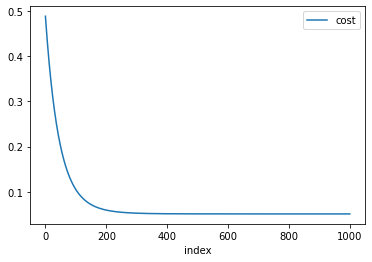

In [42]:
# print cost
gradient_descent_multi(X, y, theta, alpha, iterations).reset_index().plot.line(x='index', y=['cost'])